Loading libraries and importing data

1. Load necessary libraries.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import re
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Read your dataset as panadas data frame.

In [2]:
df=pd.read_csv('final.csv')
df = pd.DataFrame(df)
df


,Seat No.,f_Name,l_Name,Gender,PH-121,PH-121.1,HS-101,CY-105,HS-105/12,MT-111,...,DB-255,EE-217,CS-212,CS-210.1,CS-215,T_Skills,soft_skills,GPA,Major,Unnamed: 33
0,CS-97001,Abdul,Yaseen,Male,70.0,70.0,53.0,59.0,63.0,55.0,...,56,94.0,51.0,69.0,59.0,SQL,Decision-making,2.205,information system,NaN
1,CS-97002,Hussein,afi,Male,94.0,94.0,50.0,55.0,52.0,73.0,...,63,75.0,61.0,55.0,53.0,C++,Conflict,2.008,information system,NaN
2,CS-97003,Yaser,Faheem,Male,92.0,92.0,78.0,91.0,72.0,83.0,...,96,93.0,87.0,91.0,93.0,C++,Dependability,3.608,Artificial intelligence,NaN
3,CS-97004,Shadi,Hashem,Male,51.0,51.0,67.0,53.0,52.0,53.0,...,70,54.0,51.0,63.0,52.0,Mobile Development,Decision-making,1.906,information system,NaN
4,CS-97005,Shadi,Hashem,Male,51.0,51.0,67.0,53.0,52.0,53.0,...,70,54.0,51.0,63.0,52.0,Mobile Development,Decision-making,2.906,information system,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,CS-97567,Omar,Nadeem,Male,77.0,77.0,93.0,92.0,86.0,98.0,...,98,92.0,80.0,90.0,87.0,R,Critical-thinking,3.798,Artificial intelligence,NaN
575,CS-97568,Jaad,Afif,Male,100.0,100.0,94.0,92.0,92.0,90.0,...,99,94.0,92.0,91.0,77.0,eb Development,Integrity,3.772,Artificial intelligence,NaN
576,CS-97569,Zainab,Najib,Female,79.0,79.0,95.0,89.0,82.0,94.0,...,82,92.0,85.0,86.0,78.0,SQL,Adaptability,3.470,computer science,NaN
577,CS-97570,Ola,Adil,Female,93.0,93.0,80.0,51.0,90.0,53.0,...,72,74.0,55.0,72.0,53.0,Java,Communication,2.193,information system,NaN


3. Display the head of your dataset.

In [3]:
df.head(15)

,Seat No.,f_Name,l_Name,Gender,PH-121,PH-121.1,HS-101,CY-105,HS-105/12,MT-111,...,DB-255,EE-217,CS-212,CS-210.1,CS-215,T_Skills,soft_skills,GPA,Major,Unnamed: 33
0,CS-97001,Abdul,Yaseen,Male,70.0,70.0,53.0,59.0,63.0,55.0,...,56,94.0,51.0,69.0,59.0,SQL,Decision-making,2.205,information system,NaN
1,CS-97002,Hussein,afi,Male,94.0,94.0,50.0,55.0,52.0,73.0,...,63,75.0,61.0,55.0,53.0,C++,Conflict,2.008,information system,NaN
2,CS-97003,Yaser,Faheem,Male,92.0,92.0,78.0,91.0,72.0,83.0,...,96,93.0,87.0,91.0,93.0,C++,Dependability,3.608,Artificial intelligence,NaN
3,CS-97004,Shadi,Hashem,Male,51.0,51.0,67.0,53.0,52.0,53.0,...,70,54.0,51.0,63.0,52.0,Mobile Development,Decision-making,1.906,information system,NaN
4,CS-97005,Shadi,Hashem,Male,51.0,51.0,67.0,53.0,52.0,53.0,...,70,54.0,51.0,63.0,52.0,Mobile Development,Decision-making,2.906,information system,NaN
5,CS-97006,Hussein,Daoud,Male,92.0,92.0,70.0,75.0,55.0,66.0,...,86,85.0,87.0,81.0,70.0,Machine Learning,Adaptability,3.026,computer science,NaN
6,CS-97007,Fadel,Burhan,Male,72.0,72.0,59.0,85.0,51.0,87.0,...,83,91.0,66.0,74.0,55.0,Mobile Development,ork-ethic,2.957,information system,NaN
7,CS-97008,Omar,Faisal,Male,81.0,81.0,85.0,65.0,60.0,61.0,...,86,88.0,70.0,88.0,61.0,eb Development,ork-ethic,3.043,computer science,NaN
8,CS-97009,Karim,Abu,Male,89.0,89.0,62.0,90.0,54.0,76.0,...,95,95.0,65.0,86.0,65.0,Mobile Development,Adaptability,3.358,computer science,NaN
9,CS-97010,Nabil,Adnan,Male,90.0,90.0,80.0,68.0,75.0,79.0,...,95,85.0,73.0,93.0,88.0,Mobile Development,resolution,3.247,computer science,NaN


Describe your dataset using function describe( ) and explain the output in English.

In [4]:
df.describe()

,PH-121,PH-121.1,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,MT-224,CS-210,CS-211,DS-219,EE-217,CS-212,CS-210.1,CS-215,GPA,Unnamed: 33
count,566.000000,566.000000,568.000000,564.000000,565.000000,564.000000,568.000000,564.000000,564.000000,566.000000,...,560.000000,560.000000,562.00000,562.00000,563.000000,562.000000,560.000000,562.000000,569.000000,0.0
mean,78.070671,78.070671,71.943662,81.898936,76.169912,77.595745,85.496479,76.870567,77.514184,87.418728,...,76.142857,79.394643,73.11032,74.11032,79.754885,74.676157,79.394643,73.622776,2.959631,NaN
std,13.828096,13.828096,12.964896,13.400329,15.003409,13.737441,50.534532,12.405920,14.117176,230.544057,...,14.013064,12.468908,14.69337,14.69337,12.449340,12.915539,12.468908,14.422578,0.616788,NaN
min,50.000000,50.000000,50.000000,21.000000,19.000000,20.000000,50.000000,9.000000,18.000000,50.000000,...,39.000000,15.000000,9.00000,10.00000,17.000000,50.000000,15.000000,14.000000,0.998000,NaN
25%,69.250000,69.250000,61.000000,75.000000,63.000000,69.000000,75.000000,70.000000,68.000000,69.000000,...,65.000000,72.000000,60.00000,61.00000,72.000000,64.000000,72.000000,61.000000,2.548000,NaN
50%,81.000000,81.000000,72.000000,87.000000,79.000000,80.000000,87.000000,80.000000,80.500000,80.000000,...,79.000000,83.000000,74.00000,75.00000,84.000000,77.000000,83.000000,75.000000,3.029000,NaN
75%,90.000000,90.000000,83.000000,92.000000,89.000000,89.000000,92.000000,86.000000,89.000000,88.000000,...,88.000000,89.000000,86.00000,87.00000,89.000000,85.000000,89.000000,86.000000,3.452000,NaN
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,930.000000,100.000000,100.000000,5555.000000,...,100.000000,100.000000,100.00000,101.00000,100.000000,99.000000,100.000000,100.000000,3.985000,NaN


 3. Data cleaning:

1. Drop unnecessary columns in the data frame and state the reason.


In [5]:
df=df.drop(columns=['f_Name','l_Name','Unnamed: 33','HS-105/12','HS-205/20','CS-210.1','EE-217','PH-121.1','HS-101','MT-111','CS-105','CS-106','EL-102','CS-107','CS-211','CS-203','CS-212','MT-222','MT-224','CS-215','EE-222','ME-107'])
df

,Seat No.,Gender,PH-121,CY-105,EE-119,CS-210,DS-219,DB-255,T_Skills,soft_skills,GPA,Major
0,CS-97001,Male,70.0,59.0,74.0,69.0,54.0,56,SQL,Decision-making,2.205,information system
1,CS-97002,Male,94.0,55.0,55.0,55.0,54.0,63,C++,Conflict,2.008,information system
2,CS-97003,Male,92.0,91.0,88.0,91.0,99.0,96,C++,Dependability,3.608,Artificial intelligence
3,CS-97004,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,1.906,information system
4,CS-97005,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,2.906,information system
...,...,...,...,...,...,...,...,...,...,...,...,...
574,CS-97567,Male,77.0,92.0,95.0,90.0,92.0,98,R,Critical-thinking,3.798,Artificial intelligence
575,CS-97568,Male,100.0,92.0,91.0,91.0,93.0,99,eb Development,Integrity,3.772,Artificial intelligence
576,CS-97569,Female,79.0,89.0,92.0,86.0,91.0,82,SQL,Adaptability,3.470,computer science
577,CS-97570,Female,93.0,51.0,70.0,72.0,78.0,72,Java,Communication,2.193,information system


2. If a column name is not expressive, rename it.

In [6]:

df.rename(columns = {'PH-121':'Physics','CY-105':'Cyber security','EE-119':'Electrical Engineering and Electronics','CS-210':'Computer Science','DB-255':'Database','DS-219':'Data Structure'}, inplace = True)

df

,Seat No.,Gender,Physics,Cyber security,Electrical Engineering and Electronics,Computer Science,Data Structure,Database,T_Skills,soft_skills,GPA,Major
0,CS-97001,Male,70.0,59.0,74.0,69.0,54.0,56,SQL,Decision-making,2.205,information system
1,CS-97002,Male,94.0,55.0,55.0,55.0,54.0,63,C++,Conflict,2.008,information system
2,CS-97003,Male,92.0,91.0,88.0,91.0,99.0,96,C++,Dependability,3.608,Artificial intelligence
3,CS-97004,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,1.906,information system
4,CS-97005,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,2.906,information system
...,...,...,...,...,...,...,...,...,...,...,...,...
574,CS-97567,Male,77.0,92.0,95.0,90.0,92.0,98,R,Critical-thinking,3.798,Artificial intelligence
575,CS-97568,Male,100.0,92.0,91.0,91.0,93.0,99,eb Development,Integrity,3.772,Artificial intelligence
576,CS-97569,Female,79.0,89.0,92.0,86.0,91.0,82,SQL,Adaptability,3.470,computer science
577,CS-97570,Female,93.0,51.0,70.0,72.0,78.0,72,Java,Communication,2.193,information system


3. Find and remove duplicate values.

In [7]:
df.duplicated().sum() # check for duplicated values in csv file 

6

In [8]:
df.drop_duplicates(keep=False, inplace=True)

In [9]:
#Drop Duplicate Rows Keeping the First One
#this is the default behavior when no arguments are passed.


# keep first duplicate row
df = df.drop_duplicates()
print('Result DataFrame:\n', df)

Result DataFrame:
      Seat No.  Gender  Physics  Cyber security  \
0    CS-97001    Male     70.0            59.0   
1    CS-97002    Male     94.0            55.0   
2    CS-97003    Male     92.0            91.0   
3    CS-97004    Male     51.0            53.0   
4    CS-97005    Male     51.0            53.0   
..        ...     ...      ...             ...   
574  CS-97567    Male     77.0            92.0   
575  CS-97568    Male    100.0            92.0   
576  CS-97569  Female     79.0            89.0   
577  CS-97570  Female     93.0            51.0   
578  CS-97571    Male     61.0            53.0   

     Electrical Engineering and Electronics  Computer Science  Data Structure  \
0                                      74.0              69.0            54.0   
1                                      55.0              55.0            54.0   
2                                      88.0              91.0            99.0   
3                                      50.0             

In [10]:
# Drop Duplicates and Keep Last Row
#df = df.drop_duplicates(keep='last')
#print('Result DataFrame:\n', df)

In [11]:
df.duplicated().sum() # check for duplicated values in csv file 

0

4. Handle missing data (Nan and None values)

In [12]:
missing_row_values_count =df.isnull().sum(axis=1)
missing_row_values_count [0:50]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15    11
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     4
46     0
47     0
48     0
49     0
50     0
dtype: int64

In [13]:
#drop specific rows with nan values
df.drop([32,45], axis=0, inplace=True)

df

,Seat No.,Gender,Physics,Cyber security,Electrical Engineering and Electronics,Computer Science,Data Structure,Database,T_Skills,soft_skills,GPA,Major
0,CS-97001,Male,70.0,59.0,74.0,69.0,54.0,56,SQL,Decision-making,2.205,information system
1,CS-97002,Male,94.0,55.0,55.0,55.0,54.0,63,C++,Conflict,2.008,information system
2,CS-97003,Male,92.0,91.0,88.0,91.0,99.0,96,C++,Dependability,3.608,Artificial intelligence
3,CS-97004,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,1.906,information system
4,CS-97005,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,2.906,information system
...,...,...,...,...,...,...,...,...,...,...,...,...
574,CS-97567,Male,77.0,92.0,95.0,90.0,92.0,98,R,Critical-thinking,3.798,Artificial intelligence
575,CS-97568,Male,100.0,92.0,91.0,91.0,93.0,99,eb Development,Integrity,3.772,Artificial intelligence
576,CS-97569,Female,79.0,89.0,92.0,86.0,91.0,82,SQL,Adaptability,3.470,computer science
577,CS-97570,Female,93.0,51.0,70.0,72.0,78.0,72,Java,Communication,2.193,information system


In [14]:
df.dropna(axis = 0, how = 'all')

,Seat No.,Gender,Physics,Cyber security,Electrical Engineering and Electronics,Computer Science,Data Structure,Database,T_Skills,soft_skills,GPA,Major
0,CS-97001,Male,70.0,59.0,74.0,69.0,54.0,56,SQL,Decision-making,2.205,information system
1,CS-97002,Male,94.0,55.0,55.0,55.0,54.0,63,C++,Conflict,2.008,information system
2,CS-97003,Male,92.0,91.0,88.0,91.0,99.0,96,C++,Dependability,3.608,Artificial intelligence
3,CS-97004,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,1.906,information system
4,CS-97005,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,2.906,information system
...,...,...,...,...,...,...,...,...,...,...,...,...
574,CS-97567,Male,77.0,92.0,95.0,90.0,92.0,98,R,Critical-thinking,3.798,Artificial intelligence
575,CS-97568,Male,100.0,92.0,91.0,91.0,93.0,99,eb Development,Integrity,3.772,Artificial intelligence
576,CS-97569,Female,79.0,89.0,92.0,86.0,91.0,82,SQL,Adaptability,3.470,computer science
577,CS-97570,Female,93.0,51.0,70.0,72.0,78.0,72,Java,Communication,2.193,information system


In [15]:
#data.fillna(0)
df.fillna(df.mean(axis=1))

C:\Users\abdal\AppData\Local\Temp\ipykernel_26504\1189713689.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(axis=1))


,Seat No.,Gender,Physics,Cyber security,Electrical Engineering and Electronics,Computer Science,Data Structure,Database,T_Skills,soft_skills,GPA,Major
0,CS-97001,Male,70.0,59.0,74.0,69.0,54.0,56,SQL,Decision-making,2.205,information system
1,CS-97002,Male,94.0,55.0,55.0,55.0,54.0,63,C++,Conflict,2.008,information system
2,CS-97003,Male,92.0,91.0,88.0,91.0,99.0,96,C++,Dependability,3.608,Artificial intelligence
3,CS-97004,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,1.906,information system
4,CS-97005,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,2.906,information system
...,...,...,...,...,...,...,...,...,...,...,...,...
574,CS-97567,Male,77.0,92.0,95.0,90.0,92.0,98,R,Critical-thinking,3.798,Artificial intelligence
575,CS-97568,Male,100.0,92.0,91.0,91.0,93.0,99,eb Development,Integrity,3.772,Artificial intelligence
576,CS-97569,Female,79.0,89.0,92.0,86.0,91.0,82,SQL,Adaptability,3.470,computer science
577,CS-97570,Female,93.0,51.0,70.0,72.0,78.0,72,Java,Communication,2.193,information system


In [16]:
df.fillna(method = 'ffill')

,Seat No.,Gender,Physics,Cyber security,Electrical Engineering and Electronics,Computer Science,Data Structure,Database,T_Skills,soft_skills,GPA,Major
0,CS-97001,Male,70.0,59.0,74.0,69.0,54.0,56,SQL,Decision-making,2.205,information system
1,CS-97002,Male,94.0,55.0,55.0,55.0,54.0,63,C++,Conflict,2.008,information system
2,CS-97003,Male,92.0,91.0,88.0,91.0,99.0,96,C++,Dependability,3.608,Artificial intelligence
3,CS-97004,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,1.906,information system
4,CS-97005,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,2.906,information system
...,...,...,...,...,...,...,...,...,...,...,...,...
574,CS-97567,Male,77.0,92.0,95.0,90.0,92.0,98,R,Critical-thinking,3.798,Artificial intelligence
575,CS-97568,Male,100.0,92.0,91.0,91.0,93.0,99,eb Development,Integrity,3.772,Artificial intelligence
576,CS-97569,Female,79.0,89.0,92.0,86.0,91.0,82,SQL,Adaptability,3.470,computer science
577,CS-97570,Female,93.0,51.0,70.0,72.0,78.0,72,Java,Communication,2.193,information system


In [17]:
missing_row_values_count =df.isnull().sum(axis=1)
missing_row_values_count [0:50]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15    11
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
dtype: int64

In [23]:
df.loc[df['Major'] == 'information system']

,Seat No.,Gender,Physics,Cyber security,Electrical Engineering and Electronics,Computer Science,Data Structure,Database,T_Skills,soft_skills,GPA,Major
0,CS-97001,Male,70.0,59.0,74.0,69.0,54.0,56,SQL,Decision-making,2.205,information system
1,CS-97002,Male,94.0,55.0,55.0,55.0,54.0,63,C++,Conflict,2.008,information system
3,CS-97004,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,1.906,information system
4,CS-97005,Male,51.0,53.0,50.0,63.0,83.0,70,Mobile Development,Decision-making,2.906,information system
6,CS-97007,Male,72.0,85.0,90.0,74.0,74.0,83,Mobile Development,ork-ethic,2.957,information system
...,...,...,...,...,...,...,...,...,...,...,...,...
570,CS-97563,Female,80.0,94.0,82.0,69.0,68.0,74,eb Development,Problem-solving,2.821,information system
571,CS-97564,Female,87.0,95.0,69.0,78.0,77.0,93,Machine Learning,ork-ethic,2.612,information system
572,CS-97565,Male,87.0,93.0,75.0,82.0,75.0,68,Machine Learning,Dependability,2.607,information system
577,CS-97570,Female,93.0,51.0,70.0,72.0,78.0,72,Java,Communication,2.193,information system


4. Pandas’ aggregate functions:
1. Use at least four pandas’ aggregate functions. You should use them meaningfully.

▪ Example: Sum , Mean , Median, Min ,Max

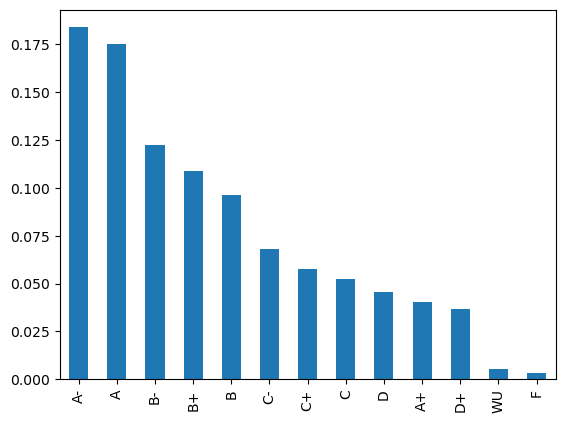

In [34]:
import matplotlib.pyplot as plt

# Load a dataframe
df = pd.read_csv("Data_major.csv")

# Calculate the frequency of each value in the column
value_counts = df["com_s"].value_counts()

# Divide the value counts by the total number of rows to get the percentage of each value
percentages = value_counts / df.shape[0]

# Plot the percentages as a bar chart
percentages.plot(kind="bar")

# Show the plot
plt.show()

In [49]:
df


,Seat No.,Sex,PH-121,HS-101,CY-105,HS-105/12,com_s,computer_science,GPA,Major
0,CS-97001,F,B-,D+,C-,C,C-,D+,2.205,information system
1,CS-97002,M,A,D,D+,D,B-,C,2.008,computer science
2,CS-97003,F,A,B,A,B-,B+,A,3.608,Artificial intelligence
3,CS-97004,F,D,C+,D+,D,D,A-,1.906,information system
4,CS-97005,M,A-,A-,A-,B+,A,A,3.448,computer science
...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,NaN,B,C,A,A-,A+,A,3.798,information system
567,CS-97568,NaN,A+,C,A,A,A,A,3.772,information system
568,CS-97569,NaN,B,C,A-,B+,A,A,3.470,information system
569,CS-97570,NaN,A,C,D,A,D,D+,2.193,information system


In [50]:
value_counts = df["Major"].value_counts()
print(value_counts)

information system          272
computer science            224
ai                           71
Artificial intelligence       4
Name: Major, dtype: int64


In [55]:
red_count = value_counts["ai"]
print(red_count)

71


In [51]:
can=df.loc[df['Major'] == 'ai']
can

,Seat No.,Sex,PH-121,HS-101,CY-105,HS-105/12,com_s,computer_science,GPA,Major
79,CS-97080,NaN,A,C,A,B-,A,A-,3.647,ai
93,CS-97094,NaN,A,C,A,B+,A-,A,3.861,ai
95,CS-97096,NaN,A,C,A+,A-,A,A+,3.925,ai
100,CS-97101,NaN,A,C,A-,C,A,A+,3.772,ai
104,CS-97105,NaN,A,C,A,C+,A+,A-,3.758,ai
...,...,...,...,...,...,...,...,...,...,...
540,CS-97541,NaN,A,C,A+,B+,A,A,3.765,ai
541,CS-97542,NaN,A-,C,A,A,A,A,3.696,ai
542,CS-97543,NaN,A,C,A,A-,A,A,3.816,ai
543,CS-97544,NaN,A,C,A,A-,A-,A,3.607,ai


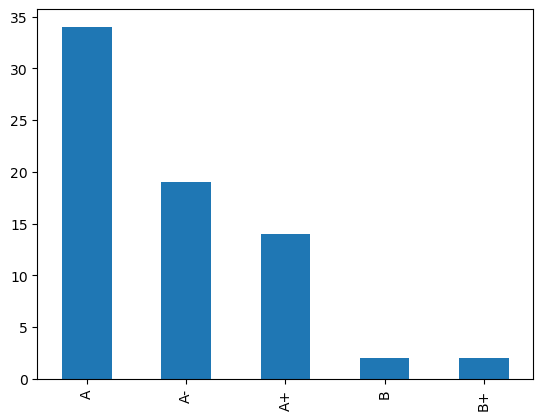

In [57]:
# Calculate the frequency of each value in the column
value_counts = can["com_s"].value_counts()

# Divide the value counts by the total number of rows to get the percentage of each value
percentages = value_counts 

# Plot the percentages as a bar chart
percentages.plot(kind="bar")

# Show the plot
plt.show()

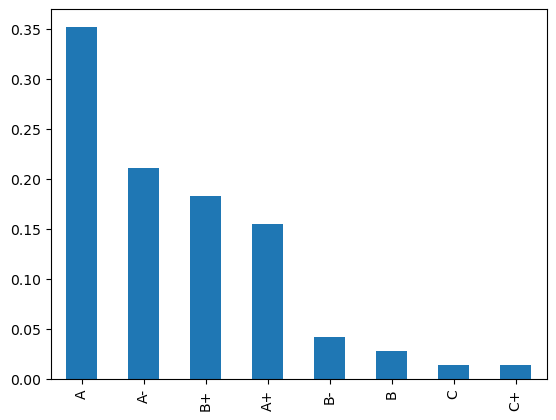

In [56]:
# Calculate the frequency of each value in the column
value_counts = can["HS-105/12"].value_counts()

# Divide the value counts by the total number of rows to get the percentage of each value
percentages = value_counts / can.shape[0]

# Plot the percentages as a bar chart
percentages.plot(kind="bar")

# Show the plot
plt.show()

In [ ]:
# Calculate the frequency of each value in the column
value_counts = df["Major"].value_counts()

# Divide the value counts by the total number of rows to get the percentage of each value
percentages = value_counts / df.shape[0]

# Plot the percentages as a bar chart
percentages.plot(kind="bar")

# Show the plot
plt.show()

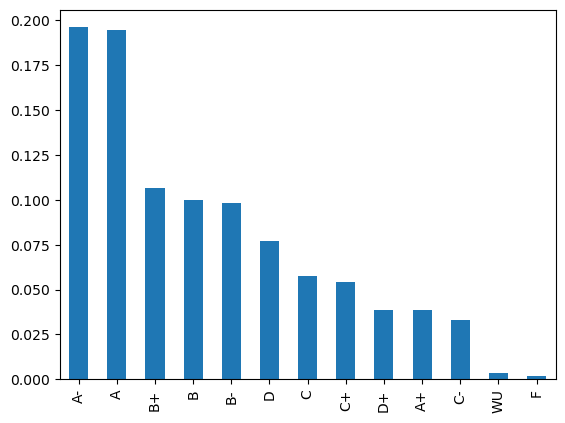

In [41]:
# Calculate the frequency of each value in the column
value_counts = df["PH-121"].value_counts()

# Divide the value counts by the total number of rows to get the percentage of each value
percentages = value_counts / df.shape[0]

# Plot the percentages as a bar chart
percentages.plot(kind="bar")

# Show the plot
plt.show()

In [32]:
df


,Seat No.,Sex,PH-121,HS-101,CY-105,HS-105/12,com_s,computer_science,GPA,Major
0,CS-97001,F,B-,D+,C-,C,C-,D+,2.205,information system
1,CS-97002,M,A,D,D+,D,B-,C,2.008,computer science
2,CS-97003,F,A,B,A,B-,B+,A,3.608,Artificial intelligence
3,CS-97004,F,D,C+,D+,D,D,A-,1.906,information system
4,CS-97005,M,A-,A-,A-,B+,A,A,3.448,computer science
...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,NaN,B,C,A,A-,A+,A,3.798,information system
567,CS-97568,NaN,A+,C,A,A,A,A,3.772,information system
568,CS-97569,NaN,B,C,A-,B+,A,A,3.470,information system
569,CS-97570,NaN,A,C,D,A,D,D+,2.193,information system


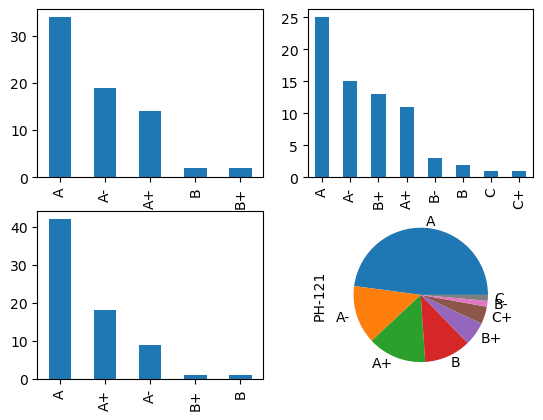

In [78]:
import matplotlib.pyplot as plt

# create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2)

# Calculate the frequency of each value in the column
value_counts = can["com_s"].value_counts()

# Divide the value counts by the total number of rows to get the percentage of each value
percentages = value_counts 

# Plot the percentages as a bar chart
percentages.plot(kind="bar", ax=axs[0, 0])




# Calculate the frequency of each value in the column
value_counts = can["HS-105/12"].value_counts()

# Divide the value counts by the total number of rows to get the percentage of each value
percentages = value_counts 

# Plot the percentages as a bar chart
percentages.plot(kind="bar", ax=axs[0, 1])





# Calculate the frequency of each value in the column
value_counts = can["CY-105"].value_counts()

# Divide the value counts by the total number of rows to get the percentage of each value
percentages = value_counts 

# Plot the percentages as a bar chart
percentages.plot(kind="bar", ax=axs[1, 0])





# Calculate the frequency of each value in the column
value_counts = can["PH-121"].value_counts()

# Divide the value counts by the total number of rows to get the percentage of each value
percentages = value_counts 

# Plot the percentages as a bar chart
percentages.plot(kind="pie", ax=axs[1, 1])






# Show the plot


# plot a scatter plot on the third subplot
#df3.plot(kind='scatter', x='x', y='y', ax=axs[1, 0])

# plot a pie chart on the fourth subplot
#df4.plot(kind='pie', y='y', ax=axs[1, 1])

# show the plot
plt.show()

In [79]:
value_counts = df["Major"].value_counts()
print(value_counts)

information system          272
computer science            224
ai                           71
Artificial intelligence       4
Name: Major, dtype: int64


In [80]:
rating_sum = df['GPA'].sum()
rating_mean = df['GPA'].mean()
rating_median = df['GPA'].median()
rating_min = df['GPA'].min()
rating_max = df['GPA'].max()

In [81]:
print(f'Sum: {rating_sum}, Mean: {rating_mean}, Median: {rating_median}, Min: {rating_min}, Max: {rating_max}')

Sum: 1687.241, Mean: 2.954887915936953, Median: 3.029, Min: 0.8, Max: 3.985


We used 
count()
mean()
sum()
describe()


5. Make any further data cleaning that is applicable to your dataset, for example

We convert the values of A+,A,B+,B,C+,C,D+.. to numerical values

5. Data visualization:
1. Plot at least four different graphs:
a. The graphs should be expressive and meaningful.
b. Each graph should have its legend.
c. Make some formatting to your graph.
d. Don’t plot two graphs covering the same area in the dataset or have the same meaning.



<AxesSubplot:>

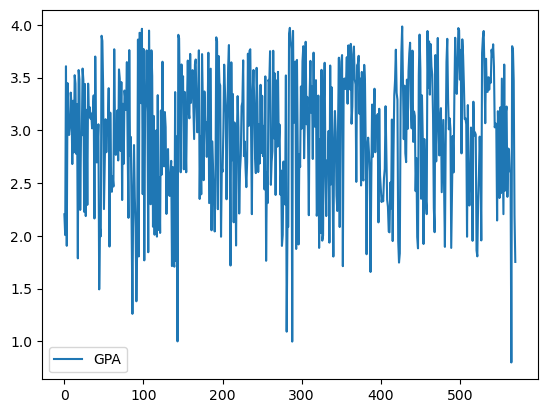

In [82]:
df.plot()

<AxesSubplot:ylabel='GPA'>

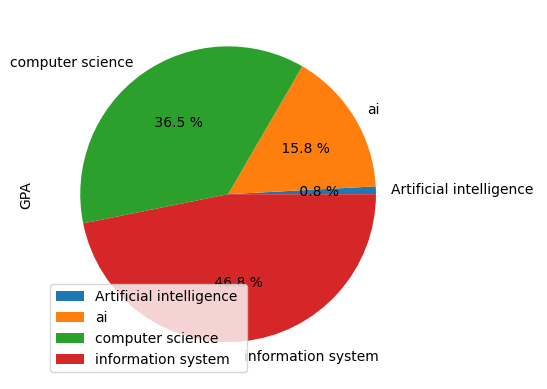

In [84]:
df.groupby(['Major']).sum().plot( kind='pie', y='GPA', autopct = "% .1f %%")

In [22]:
# Extract the degree values from the subject column and cast them to int
df = df.dropna()
df["degree"] = df["CS-406"].str.extract("(\d+)")

# Pivot the data to create separate columns for each subject
pivoted_df = df.pivot(index=["Seat No.", "Major"], columns="CS-406", values="degree")

# Calculate the average degree for each subject in each major
average_degrees = pivoted_df.groupby("Major").mean()

# Create a bar plot for each subject
for subject in pivoted_df.columns:
    plt.bar(df["Major"], df[subject])
    plt.xlabel("Major")
    plt.ylabel("Degree")
    plt.title(f"Degrees for {subject} by Major")
    plt.show()

# Create a scatterplot
for major in average_degrees.index:
    plt.scatter(average_degrees.columns, average_degrees.loc[major])
    plt.xlabel("Subject")
    plt.ylabel("Average Degree")
    plt.title(f"Average Degrees for {Major}")
    plt.show()

KeyError: 'CS-406'

In [ ]:
df.plot.barh(stacked=True)

In [ ]:
df=pd.read_csv('Dataset2.csv')
df = pd.DataFrame(df)

In [ ]:
df.loc[df['Major'] == 'information system']

In [ ]:
df.groupby(['MT-111']).sum().plot( kind='pie', y='Major', autopct = "% .1f %%")

In [ ]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

my_labels = ('A','B','C','D','F','A+')

ax = df['MT-111'].value_counts().plot(kind='pie', figsize=(12,5), autopct=autopct, labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

In [ ]:
revenue=df['Major']
expense=df['MT-111']
biz_date = pd.Series(pd.date_range(start='2/10/23', end = '2/23/23', freq='B')
revenue = pd.DataFrame(dict(revenues = revenue, expenses =expense), index = biz_date)
perf_scatter = revenue .plot.scatter(x='Major', y='MT-111')
perf_scatter.set_title("Revenue vs Expenses");

In [ ]:
# saving the dataframe
df.to_csv('final2.csv')

In [ ]:
# Select the dependent and independent variables
X = df[["Data_Structure", "Computer_Science", "Database"]]
y = df["Major"]

# Encode categorical variables as numerical values
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)